# Exercises: Data Analysis with Python

In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

## Astronomical Data
There are billions of stars in our universe. Especially over the last few decades a lot of data about their properties has been collected with telescopes like the *Hubble* or the *James Webb Space Telescope*. Catalogs like *Hipparcos* or *GAIA* compile large amounts of data. Analysing millions or billions of datasets can be a challenging task, but libraries like Polars make the process quite efficient.

#### Import Data
The file *hygdata_v41.csv* containts data about almost 120'000 stars from three well-known catalogs (Hipparcos, Yale Bright Stars, Gliese), hence the name HYG.

Import the data into a polars dataframe and find out about the meaning of the different columns (see https://github.com/astronexus/HYG-Database/tree/main/hyg).

Find data for some well-known stars, e.g. the distance to  Sirius or the radial velocity of Vega.

In [8]:
path = 'data/hygdata_v41.csv'

df = pl.read_csv(path)

print('list of column headers: \n', df.columns, end='\n\n')
print(f'number of objects in dataset: {df.shape[0]}', end='\n\n')

dist_sirius = df.filter(pl.col('proper') == 'Sirius').get_column('dist').to_list()[0]
v_vega = df.filter(pl.col('proper') == 'Vega').get_column('rv').to_list()[0]

print(f'Distance to Sirius: {dist_sirius} pc')
print(f'Radial velocity of Vega: {v_vega} km/s')

list of column headers: 
 ['id', 'hip', 'hd', 'hr', 'gl', 'bf', 'proper', 'ra', 'dec', 'dist', 'pmra', 'pmdec', 'rv', 'mag', 'absmag', 'spect', 'ci', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'rarad', 'decrad', 'pmrarad', 'pmdecrad', 'bayer', 'flam', 'con', 'comp', 'comp_primary', 'base', 'lum', 'var', 'var_min', 'var_max']

number of objects in dataset: 119626

Distance to Sirius: 2.6371 pc
Radial velocity of Vega: -12.1 km/s


### Hertzsprung-Russell
Stars can be categorized based on their surface temperature (related to the colour of a star) and their luminosity (related to the brightness).

In a *Hertzsprung-Russell* the luminosity (usually in a logarithmic scale in units of *magnitudes*) is graphed vs. the surface temperature or the color index. As a convention, the color index decreases from left to right, which corresponds to a temperature increase.

Using the collumns 'ci' (color index) and 'absmag' (absolute magnitude), create a Hertzsprung-Russell diagram for all stars in the dataframe. Mark the position of our Sun (Sol) in the diagram.

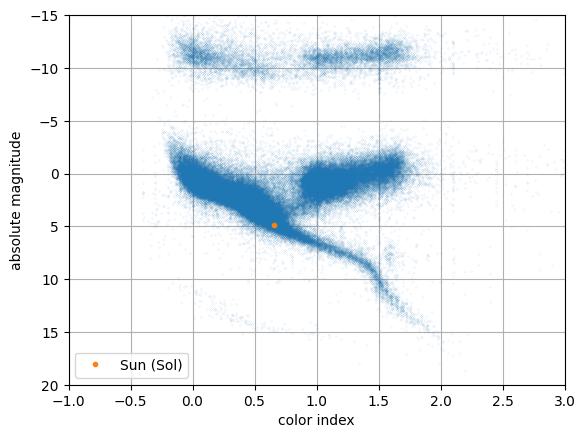

In [110]:
ci = df.select(pl.col('ci'))
mag = df.select(pl.col('absmag'))
ci_sun = df.filter(pl.col('proper') == 'Sol').select(pl.col('ci'))
mag_sun = df.filter(pl.col('proper') == 'Sol').select(pl.col('absmag'))

plt.plot(ci, mag, '.', ms=0.1)
plt.plot(ci_sun, mag_sun, 'o', ms=3, label='Sun (Sol)')
plt.xlim(-1, 3)
plt.ylim(20, -15)
plt.xlabel('color index')
plt.ylabel('absolute magnitude')
plt.grid()
plt.legend()
plt.show()

In order to convert the color index to the perceived colour, the steps described in https://stackoverflow.com/questions/21977786/star-b-v-color-index-to-apparent-rgb-color can be followed. Create a version of the Hertzsprung-Russell diagram with the temperature as the horizontal axis and with data points plotted with the colour of the corresponding star.

In [249]:
def bv2T(bv):
    return 4600 * (1/(0.92*bv + 1.7) + 1/(0.92*bv + 0.62))
    
def T2rgb(T):
    convert = pl.read_csv('kelvin2rgb_10deg.csv')
    alpha = 0.5
    
    temp = np.array(convert.get_column('T'))
    red = np.array(convert.get_column('r'))
    green = np.array(convert.get_column('g'))
    blue = np.array(convert.get_column('b'))

    r = np.interp(T, temp, red)
    g = np.interp(T, temp, green)
    b = np.interp(T, temp, blue)

    colors = [(a, b, c, alpha) for a, b, c in zip(r, g, b)]
                      
    return colors

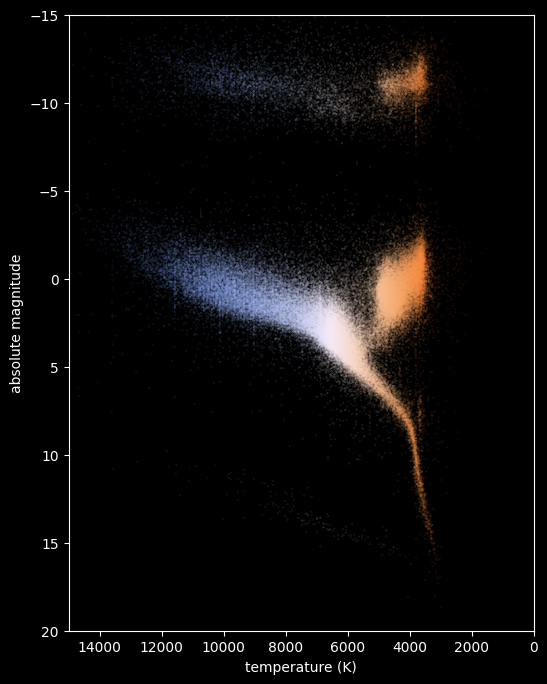

In [256]:
ci = df.get_column('ci')
mag = df.get_column('absmag')
temp = bv2T(ci)
color = T2rgb(temp)

plt.figure(figsize=(6, 8), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

plt.scatter(temp, mag, s=.01, facecolors=color)
plt.xlim(15000, 0)
plt.ylim(20, -15)
plt.xlabel('temperature (K)')
plt.ylabel('absolute magnitude')
plt.show()